In [2]:
# для установки библиотек
# ! pip3 install seaborn
# ! pip3 install plotly
# ! pip3 install ggplot
# ! pip3 install matplotlib

# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Заберем данные из файла
dataCSV = pd.read_csv('tmdb_5000_movies.csv', parse_dates=['release_date'])


In [4]:
#Просмотрим информацию о данных
dataCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null datetime64[ns]
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 n

## 1. ГРАФИК "Количество выпущенных фильмов по годам"

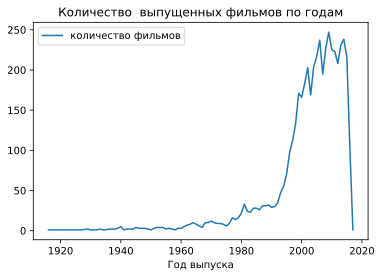

In [5]:
dataCSV['release_year'] = dataCSV['release_date'].map(lambda x: x.year)
data = dataCSV[['id', 'release_year']].groupby('release_year').count()

ax = data.plot(title='Количество  выпущенных фильмов по годам')
ax.set_xlabel('Год выпуска')
ax.legend(['количество фильмов'])


## 2. График "Корреляция популярности и среднего балла фильма"

Text(0.5,0.98,'Корелляция популярности и среднего балла фильма')

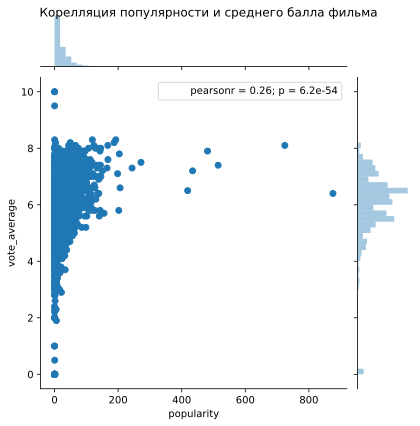

In [6]:
g = sns.jointplot(x='popularity', y='vote_average', data=dataCSV[dataCSV.release_year>2000], kind='scatter')
g.fig.suptitle('Корелляция популярности и среднего балла фильма')


## 3. График  "Распределение среднего балла"

Text(0.5,1,'Распределение среднего балла')

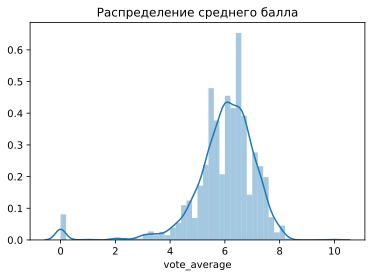

In [6]:
dataCSV['count_by_year'] = dataCSV[['release_year','original_language']].groupby(['release_year'])['original_language'].transform('count')
dataCSV['random_genre'] = dataCSV['genres'].map(lambda x: pd.read_json(x)).map(lambda x: "Undefined" if x.empty else x.sample(1).iloc[0]['name'])
g = sns.distplot(dataCSV[dataCSV['release_year'] > 2000].vote_average)
g.set_title(label="Распределение среднего балла")

## 4. График "Распределение среднего балла за фильм по оригинальному языку фильма

Text(0.5,1,'Распределение среднего балла за фильм по оригинальному языку фильма')

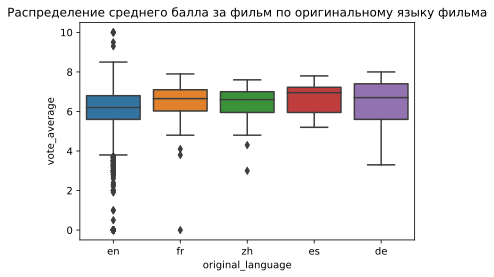

In [7]:
top_languages = dataCSV.original_language.value_counts().sort_values(ascending = False).head(5).index.values
g = sns.boxplot(x="original_language", y="vote_average", 
            data=dataCSV[dataCSV.original_language.isin(top_languages)])
g.set_title(label="Распределение среднего балла за фильм по оригинальному языку фильма")

## 5. График "Статистика по популярности, среднему баллу, жанру и бюджету"

In [8]:
top_genres = dataCSV.random_genre.value_counts().sort_values(ascending = False).head(5).index.values

popularity_data = dataCSV[dataCSV.random_genre.isin(top_genres)].groupby('random_genre')[['vote_average', 'popularity']].mean()
revenue_data = dataCSV[dataCSV.random_genre.isin(top_genres)].groupby('random_genre')[['revenue']].mean()

genres_data = revenue_data.join(popularity_data)
    
genres_data.head()

AttributeError: 'DataFrame' object has no attribute 'random_genre'

In [9]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

In [ ]:
trace0 = go.Scatter(
    x=dataCSV.vote_average,
    y=genres_data.popularity,
    mode = 'markers+text',
    text = genres_data.index,
    marker = dict(
        size = 1/1000000*genres_data.revenue,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver', 'plum'
        ]
    )
)

data = [trace0]
layout = {
    'title': 'Статистика по популярности, среднему баллу, жанру и бюджету',
    'xaxis': {'title': 'Vote average'},
    'yaxis': {'title': 'Popularity'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)